# I-94 Traffic Analysis

### In this project we will be utilizing the `Metro_Interstate_Traffic_Volume.csv` made available by John Hogue and downloaded from the UCI Machine Learning Repository. The goal of this project is to determine a few indicators of heavy traffic on the I-94, such as weather type, time of day, and time of the week.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


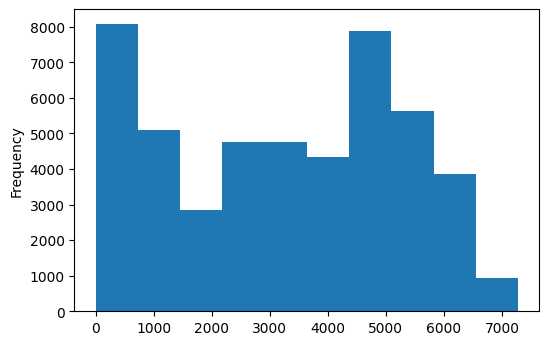

In [4]:
traffic['traffic_volume'].plot.hist()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Analyzing our histogram and traffic volume, we can see that 25% of the time, there are 1,193 cars or fewer passing each station. 75% of the time the traffic volume is 4,933 cars or fewer. We will now want to see the effect of time of day on our traffic volume.

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
day = traffic[traffic['date_time'].dt.hour.between(7, 19, inclusive = 'left')]
night = traffic[~traffic['date_time'].dt.hour.between(7, 19, inclusive = 'left')]

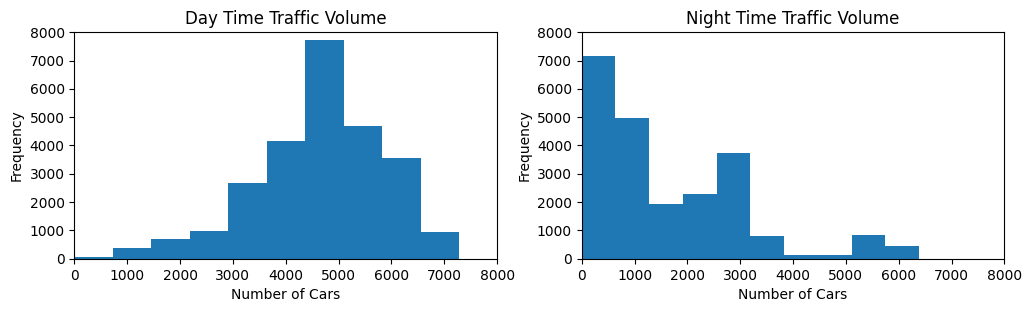

In [8]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title("Day Time Traffic Volume")
plt.xlabel("Number of Cars")
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title("Night Time Traffic Volume")
plt.xlabel("Number of Cars")
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(0,8000)

plt.show()

In [9]:
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

### Looking at the histograms of both day time and night time traffic volume, we can see that day time traffic is normally distributed and centered around 4650 cars. Night time traffic volume has a right skewed distribution, with a much lwoer mean of 1654 cars. Night time traffic appears significantly lighter than daytime traffic, so in order to find indicators of heavy traffic, we will now be focusing solely on the daytime data.

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

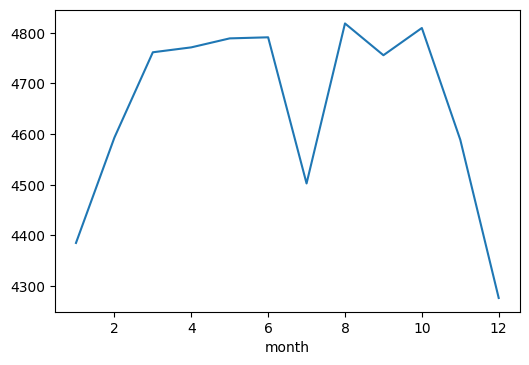

In [12]:
by_month['traffic_volume'].plot.line()

### Analyzing our line plot, it appears as though during the month of July  as well as the winter months there is a significant decrease in traffic on average.

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']# 0 is Monday, 6 is Sunday

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

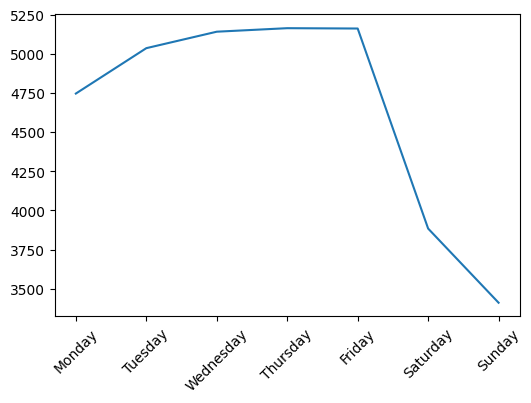

In [14]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.show()

###  As shown in the line plot, the day of the week has an impact on traffic volume, with the weekend days seeing far less traffic than the weekdays, most likely due to commuting to work.


In [15]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


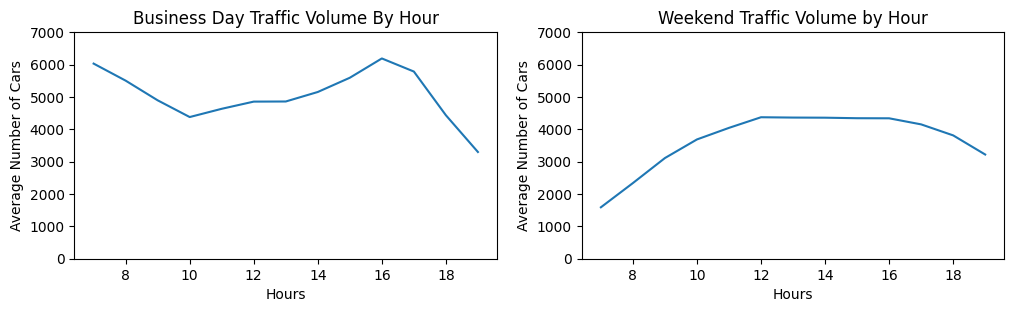

In [16]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title("Business Day Traffic Volume By Hour")
plt.xlabel("Hours")
plt.ylabel("Average Number of Cars")
plt.ylim(0,7000)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title("Weekend Traffic Volume by Hour")
plt.xlabel("Hours")
plt.ylabel("Average Number of Cars")
plt.ylim(0,7000)

plt.show()

### On business days, it appears that peak traffic ours occur from 7-8am and 4-5pm. This would coincide with the usual times that people go to and leave from work. 

In [17]:
day.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

(230.0, 320.0)

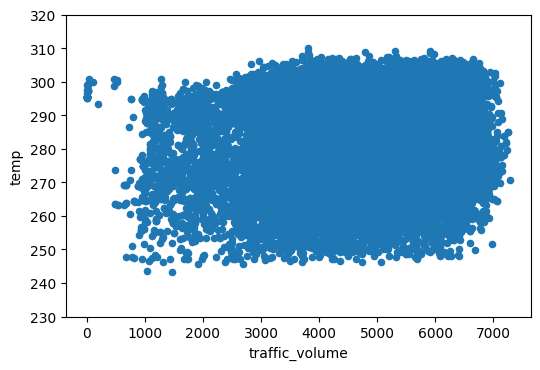

In [18]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)

### None of the columns appear to have a strong correlation with traffic volume. Temperature has the highest correlation value, but after plotting a scatterplot, we can see that temperature does not appear to be a large indicator of heavy traffic. 

In [19]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

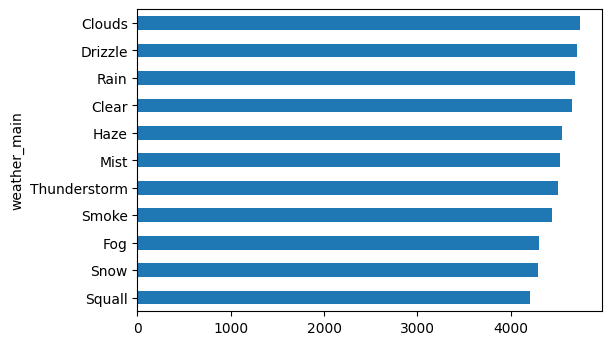

In [26]:
by_weather_main['traffic_volume'].sort_values().plot.barh()

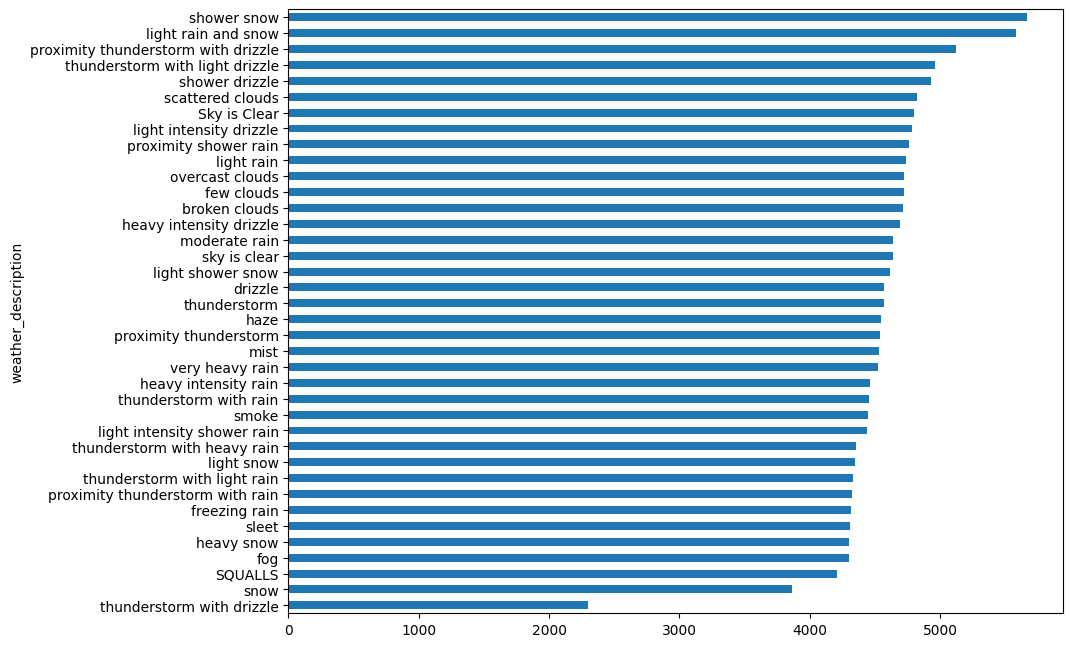

In [25]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(10,8))

### After reviewing the bar plots, we can see that both shower snow as well as light rain and snow both produce traffic volume of above 5000 cars. When compared to other weather factors, these two weather conditions stand out.

## Conclusion

### After analysis, we conclude that the mian factors for heavy traffic flow are firstly, time of day, day of the week, and month of the year. We concluded that the summer months, weekdays, and the time being 7-8am and 4-5pm most heavily impacts traffic. Additionally, we found that the weather conditions of shower snow and light rain and snow